In [13]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [14]:
# reading dataset
dataset = pd.read_csv("/content/Reviews.csv")
dataset.dropna(inplace=True)
dataset

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


Text(0.5, 1.0, 'Histogram of Scores')

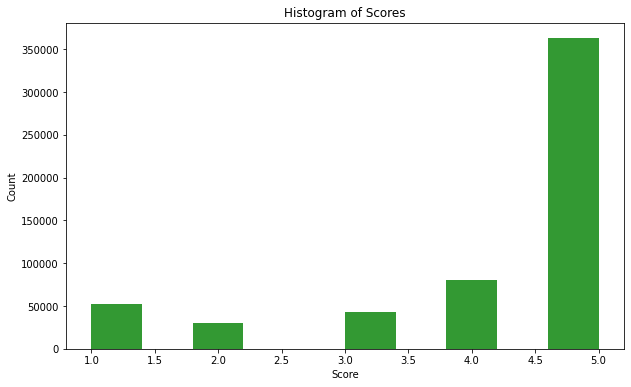

In [15]:
# Score Visualization
fig = plt.figure(figsize=(10,6))
fig = dataset['Score'].hist(facecolor='g', alpha = 0.8)
plt.grid(False)
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Histogram of Scores")

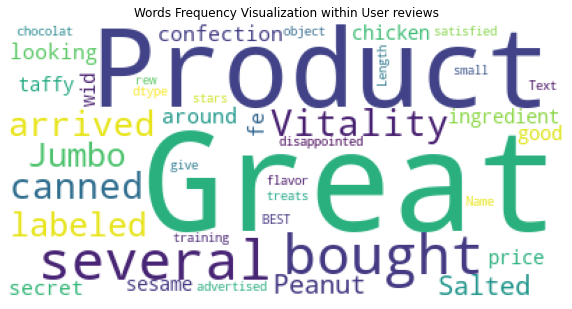

In [16]:
#Words Frequency Visualization within User reviews 
cloud = WordCloud(background_color='white',
                      max_words=500, 
                      max_font_size=100).generate(str(dataset["Text"]))

plt.figure(figsize=(10,8))
plt.title("Words Frequency Visualization within User reviews")
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [17]:
dataset.drop(dataset[dataset['Score']==3].index,inplace=True) #Drop neutral rating
score = dataset['Score'].apply(lambda x: 1 if x > 3 else 0) #Use 1 for positive ratings and 0 for negative ratings
dataset['Score'] = score

In [18]:
# Create new dataset with required columns
new_dataset = dataset[['Text','Score']]
new_dataset.head()

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [19]:
#Splitting test and training data
docs_train, docs_test, y_train, y_test = train_test_split(
    new_dataset.Text, new_dataset.Score, test_size=0.2, random_state=None)

print("Training data size:" + str(len(docs_train)))
print("Test data size:" + str(len(docs_test)))

Training data size:420618
Test data size:105155


In [24]:
#Build pipeline using Logistic Regression model, Data vectorization, and Feature transformation
from sklearn.linear_model import LogisticRegression
from nltk.stem.wordnet import WordNetLemmatizer


pipeline = Pipeline([
        ('vect', CountVectorizer(min_df=10, stop_words="english")),
        ('tfidf', TfidfTransformer()),
        # ('ps', WordNetLemmatizer()),
        ('LR', LogisticRegression(max_iter=10)),
    ])
#Cross validation
parameters = {'vect__ngram_range': [(1, 1), (1, 2)]} # unigrams or bigrams
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)
#Model Prediction
y_predicted = grid_search.predict(docs_test)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [25]:
from sklearn.metrics import classification_report
#Display Accuracy score
print('\nLogistic Regression Classification report:','\n',classification_report(y_test,y_predicted))


Logistic Regression Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.46      0.59     16100
           1       0.91      0.98      0.94     89055

    accuracy                           0.90    105155
   macro avg       0.86      0.72      0.76    105155
weighted avg       0.89      0.90      0.89    105155

